Автор:     Шестаков Михаил Сергеевич  
Telegram:  https://t.me/mshestakov1  
email:     mikhail-shestakov-2022@bk.ru  

# Анализ рынка заведений общественного питания Москвы
Заказчик исследования: потенциальный владелец кафе.

Цель исследования: формирование общего представления о рынке заведений общественного питания Москвы у потенциальных инвесторов с целью их привлечения в проект открытия кафе.  

***Презентация в формате PDF:***
https://disk.yandex.ru/i/q0lmX6uGscdp2w

Содержание исследования:  
1. [Общий анализ исходной таблицы](#open_file)  
 1.1. [Импорт библиотек](#import)  
 1.2. [Создание датафреймов](#read)  
 1.3. [Общая информация о датафрейме df](#info_all)  

    
    
2. [Предобработка данных](#data_preprocessing)  
    * [Оптимизация типа категориальных значений](#category_type)  
    * [Оптимизация типа целочисленных значений](#int_type)  
    * [Удаление дубликатов](#drop_dupl)  
    
    
3. [Анализ рынка заведений общественного питания](#analysis)  
 3.1. [Общий анализ рынка заведений общественного питания](#general_analysis)  
    * [Соотношение видов объектов общественного питания по количеству](#number_type)  
    * [Соотношение сетевых и несетевых заведений по количеству](#chain_nochain)  
    * [Сетевое распространение по видам объектов общественного питания](#chain_type)  
    * [Количество посадочных мест по сетям](#number_chain)  
    * [Среднее количество посадочных мест по типу заведений](#mean_number_type)  
    
 3.2. [Анализ заведений общественного питания по месту расположения](#address)  
    * [Адреса без указания улиц](#no_street)  
    * [Топ-10 улиц по количеству объектов общественного питания](#top_10)  
    * [Улицы, на которых расположено по одному объекту общественного питания](#one_object_streets)   
    * [Распределение среднего количества посадочных мест для улиц с наибольшим числом объектов общественного питания](#mean_number_top10)  
    
4. [Общий вывод](#final)  
    * [Рекомендации](#recom) 

## Общий анализ исходной таблицы
<a id="open_file"></a>

***Импорт библиотек***

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import BytesIO
import requests

***Создание датафреймов***
<a id="read"></a>

Создаем датафрейм df, содержащий данные по заведениям общественного питания Москвы:

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

Создаем датафрейм df_district, содержащий данные о распределении улиц Москвы по районам города:

In [3]:
spreadsheet_id = '1-7vEVwanYiUP7qKDCXa3kn4FVfj1DkZlgX8BuQ6-upQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_district = pd.read_csv(BytesIO(r.content))

***Общая информация о датафрейме df***
<a id="info_all"></a>

Выводим случайные 5 строк датафрейма:

In [4]:
df.sample(n=5, random_state=1)

,id,object_name,chain,object_type,address,number
2973,22736,Луна,нет,кафе,"город Москва, Михалковская улица, дом 38, стро...",40
2593,29065,Столовая ГБОУ 45 Гимназия имени Л.И. Мильграмма,нет,столовая,"город Москва, улица Гримау, дом 8",300
6737,23349,Столовая ГБОУ СОШ № 1900,нет,столовая,"город Москва, Дубравная улица, дом 41, корпус 4",240
14940,222539,Holy Vegan,нет,кафе,"город Москва, Ходынский бульвар, дом 4",0
4088,26585,Ресторан «Очаг гурманов»,нет,ресторан,"город Москва, Каширское шоссе, дом 51, корпус 3",42


Выводим общую информацию:

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.1 MB


Определяем количество пропусков в соответствующих полях:

In [6]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Выводим описательную статистику для строковых значений:

In [7]:
df.describe(include='object').T

,count,unique,top,freq
object_name,15366,10393,Столовая,267
chain,15366,2,нет,12398
object_type,15366,9,кафе,6099
address,15366,9108,"город Москва, Ходынский бульвар, дом 4",95


Выводим описательную статистику для числовых значений:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15366.0,119720.066901,73036.130732,838.0,28524.0,144974.5,184262.25,223439.0
number,15366.0,59.547182,74.736833,0.0,12.0,40.0,80.00,1700.0


In [9]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


По id проверяем, присутствует ли в датафрейме дублирование данных:

In [10]:
duplicat = df.loc[df['id'].duplicated() == True]['id'].count()
duplicat

0

***Вывод:***  
Датафрейм содержит данные по 15366 объектам, пропуски отсутствуют. Размер датафрейма - 7,1 MB.  
По полю "id" дубликатов нет.  
Символы текстовых полей имеют различный регистр. По текстовым полям возможны дубликаты.  
Количество посадочных мест достигает неоправданно высоких значений - максимум 1700. Возможны выбросы в поле "number".

## Предобработка данных
<a id="data_preprocessing"></a>

Создаем рабочую копию исходной таблицы:

In [11]:
df_final = df.copy()                                   #Создаем рабочую копию датафрейма

***Оптимизация типа категориальных значений***
<a id="category_type"></a>

Определяем процент уникальных значений данных в полях, которые можно отнести к категориальным. Если он менее 50%, заменяем тип поля на "categoty":

In [12]:
category_list = ['chain', 'object_type']                                    #Список полей с категориальными значениями
percent_list = []                                                           #Список для полей у которых будет изменен тип
for i in category_list:                                                     #Цикл по полям с категориальными значениями
    percent = len(df_final[i].unique()) / len(df_final)                     #процент уникальных значений
    print('Процент уникальных значений {} от общего количества = {:0.2%}'
        .format(i, percent))
    if percent < 50:                                                        #Если процент уникальных значений < 50
        percent_list.append(i)                                              #Добавляем поле в список для изменения типа
        
if len(percent_list) != 0:                                                  #Если список не пустой
    for i in percent_list:                                                  #Проходим циклом по списку полей для изменения типа
        df_final = df_final.astype({i : 'category'})                        #меняем тип поля на "category"

Процент уникальных значений chain от общего количества = 0.01%
Процент уникальных значений object_type от общего количества = 0.06%


***Оптимизация типа целочисленных значений***
<a id="int_type"></a>

Значения поля "id" укладываются в диапазон от 0 до 4294967295 (соответствует типу uint32), а "number" - в диапазон от 0 до 65535 (соответствует типу uint16). Поскольку числа приведенных типов имеют меньший размер (4 и 2 байта соответственно), чем числа типа int64 (8 байт), целесообразно привести значения к ним:

In [13]:
df_final = df_final.astype({'id' : 'uint32', 'number' : 'uint16'})                   #изменение типа данных

***Удаление дубликатов***
<a id="drop_dupl"></a>

Приводим значения текстовых полей к единому (нижнему) регистру:

In [14]:
text_list = ['object_name', 'chain', 'object_type', 'address']             #Список полей, содержащих текстовые данные
for i in text_list:                                                        #Проходим циклом по списку
    df_final[i] = df_final[i].apply(lambda x: x.lower())                   #Переводим в нижний регистр

Удаляем дубликаты:

In [15]:
df_final = (
    df_final
    .drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])      #Удалиение дубликатов по 5 полям
    .reset_index()                                                                             #Сброс индексов
)
print('Удалено {} дубликатов.'.format(df['address'].count() - df_final['address'].count()))


Удалено 85 дубликатов.


***Обработка выбросов по количеству посадочных мест***

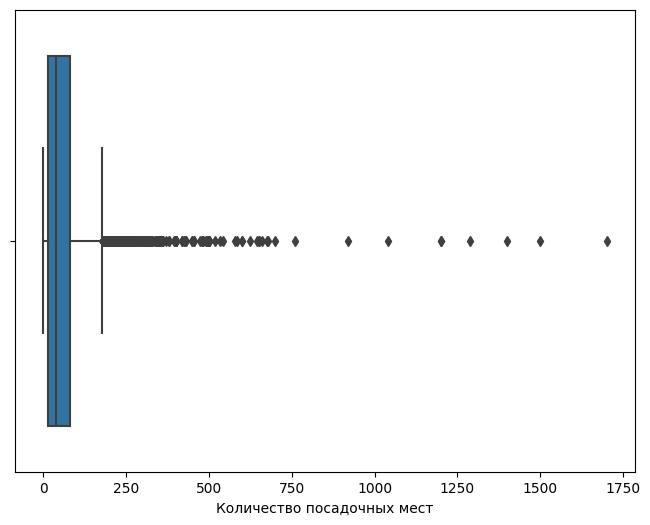

In [16]:
plt.figure(figsize = (8,6))                                      #Размер графика            
ax1 = sns.boxplot(data=df_final, x='number')                     #Тип графика
plt.xlabel('Количество посадочных мест')                         #Подпись оси x
plt.show()

Присутствуют выбросы за пределы Q3+1,5*IQR. Удаляем их из датафрейма:

In [17]:
before = df_final['number'].count()                         #Количество строк в датафрейме до удаления
q25 = df_final['number'].quantile(0.25)                     #1 квартиль
q75 = df_final['number'].quantile(0.75)                     #3 квартиль
maximum = q75 + 1.5 * (q75 - q25)                           #Q3+1,5*IQR
df_final = df_final.loc[(df_final['number'] <= maximum)].reset_index(drop=True)  #оставляем в таблице значения <= Q3+1,5*IQR
print('Удалено {} выбросов.'.format(before - df_final['number'].count()))

Удалено 1201 выбросов.


Выводим описательную статистику для числовых значений:

In [18]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
index,14080.0,7867.746946,4483.229834,0.0,3924.75,8094.5,11757.25,15365.0
id,14080.0,125265.829048,71728.546332,5882.0,28900.50,150882.0,186736.50,223439.0
number,14080.0,43.314560,39.426121,0.0,11.00,35.0,60.00,178.0


Выводим общую информацию:

In [19]:
df_final.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14080 entries, 0 to 14079
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        14080 non-null  int64   
 1   id           14080 non-null  uint32  
 2   object_name  14080 non-null  object  
 3   chain        14080 non-null  category
 4   object_type  14080 non-null  category
 5   address      14080 non-null  object  
 6   number       14080 non-null  uint16  
dtypes: category(2), int64(1), object(2), uint16(1), uint32(1)
memory usage: 5.4 MB


***Вывод:***  
Тип данных полей "chain" и "object_type" изменен с "object" на "category".  
Типы данных полей "id" и "number" изменены с "int64" на "uint32" и "uint16" соответственно.  
Удалено 85 дубликатов.  
Удалено 1201 выбросов по количеству посадочных мест.  
В результате оптимизации типов данных размер таблицы уменьшен на 24% (с 7.1 до 5.4 MB).  

## Анализ рынка заведений общественного питания
<a id="analysis"></a>

### Общий анализ рынка заведений общественного питания
<a id="general_analysis"></a>

***Соотношение видов объектов общественного питания по количеству***
<a id="number_type"></a>

Рассчитываем количество заведений для каждого вида:

In [20]:
type_count = (
    df_final
    .groupby('object_type')['id'].count()                                  #Группируем по типу заведений и считаем их количество
    .sort_values(ascending=False)                                          #Сортируем
    .reset_index()                                                         #Сброс индексов
    .rename(columns={'id': 'total_obj'})                                   #Переименование
    .assign(perc = lambda x: x['total_obj'] * 100 / x['total_obj'].sum())  #Добавление поля perc - процент заведений соответствующего типа
)
type_count

,object_type,total_obj,perc
0,кафе,5999,42.606534
1,ресторан,2029,14.410511
2,предприятие быстрого обслуживания,1880,13.352273
3,столовая,1767,12.549716
4,бар,845,6.001420
5,буфет,546,3.877841
6,кафетерий,394,2.798295
7,закусочная,347,2.464489
8,магазин (отдел кулинарии),273,1.938920


Создаем диаграмму:

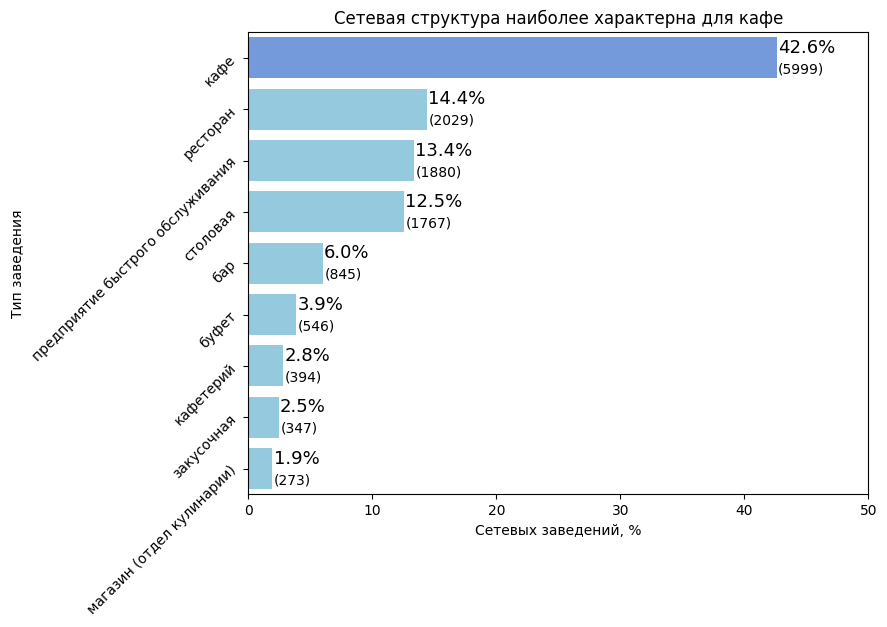

In [21]:
plt.figure(figsize = (8,6))
clrs = ['cornflowerblue' if x == 'кафе' else 'skyblue' for x in type_count['object_type']]
ax = sns.barplot(x='perc', y='object_type', data=type_count,
                 order=type_count.sort_values('perc', ascending=False).object_type, palette=clrs)
plt.xlim([0, 50])
plt.yticks(rotation=45)
plt.title(label = 'Сетевая структура наиболее характерна для кафе')
plt.xlabel('Сетевых заведений, %')
plt.ylabel('Тип заведения')
percents = list(type_count['total_obj'])
for i, y in enumerate(ax.patches):
    label_per = percents[i]
    ax.text(y.get_width()+.09, y.get_y()+.3, str(f'{round((y.get_width()), 1)}%'), fontsize=13)
    ax.text(y.get_width()+.12, y.get_y()+.7, str(f'({round((label_per), 1)})'), fontsize=10)
plt.show()

Наибольшее широко в Москве представлены кафе - 42.6%. Реже всего встречаются буфеты (3.9%), кафетерии (2.8%), закусочные (2.5%), магазин (отдел кулинарии) (1.9%).

***Соотношение сетевых и несетевых заведений по количеству***
<a id="chain_nochain"></a>

Рассчитываем количество сетевых и несетевых заведений:

In [22]:
chain_count = (
    df_final
    .groupby('chain')['id']
    .count()
    .reset_index()
)
chain_count

,chain,id
0,да,2849
1,нет,11231


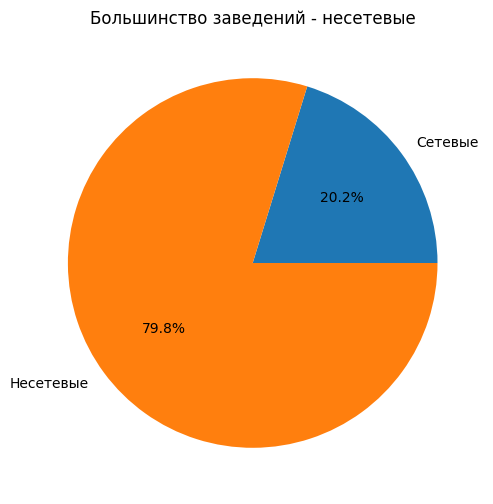

In [23]:
labels = 'Сетевые', 'Несетевые'
sizes = list(chain_count['id'])
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(label = 'Большинство заведений - несетевые')
plt.show()

Сетевой заведения составляют 20.2% от общего числа.

***Сетевое распространение по видам объектов общественного питания***
<a id="chain_type"></a>

Рассчитываем количество сетевых заведений для каждого вида:

In [24]:
type_chain = (
    df_final
    .loc[df_final['chain'] == 'да']
    .groupby(['object_type'])['id'].count()
    .reset_index()
    .rename(columns={'id': 'total_chain'})
    .merge(type_count[['object_type', 'total_obj']], how='inner', left_on='object_type', right_on='object_type')
    .assign(perc = lambda x: x['total_chain'] * 100 / x['total_obj'])
    .sort_values(by='perc', ascending=False)
)
type_chain

,object_type,total_chain,total_obj,perc
6,предприятие быстрого обслуживания,773,1880,41.117021
5,магазин (отдел кулинарии),78,273,28.571429
7,ресторан,471,2029,23.213406
3,кафе,1368,5999,22.803801
2,закусочная,56,347,16.138329
4,кафетерий,52,394,13.197970
0,бар,37,845,4.378698
1,буфет,11,546,2.014652
8,столовая,3,1767,0.169779


Создаем диаграмму:

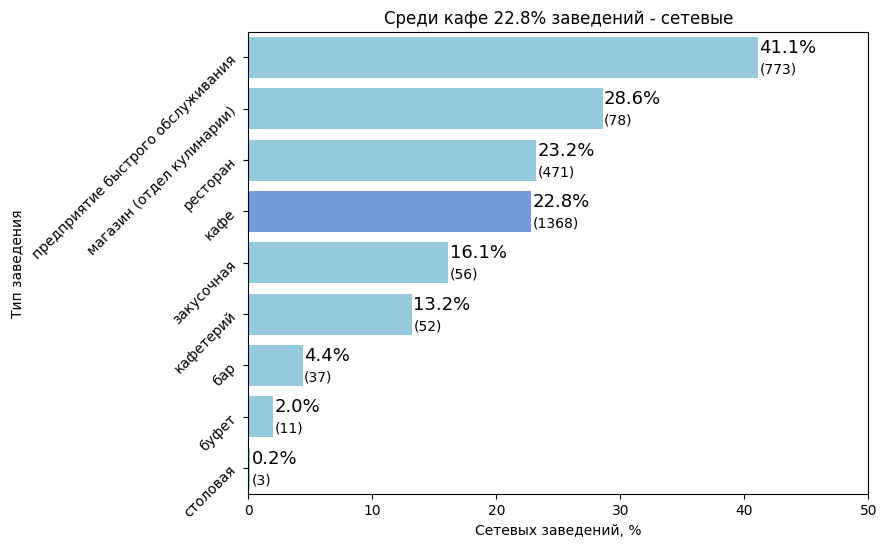

In [25]:
plt.figure(figsize = (8,6))
clrs = ['cornflowerblue' if x == 'кафе' else 'skyblue' for x in type_chain['object_type']]
ax = sns.barplot(x='perc', y='object_type', data=type_chain,
                 order=type_chain.sort_values('perc', ascending=False).object_type, palette=clrs)
plt.xlim([0, 50])
plt.yticks(rotation=45)
plt.title(label = 'Среди кафе 22.8% заведений - сетевые')
plt.xlabel('Сетевых заведений, %')
plt.ylabel('Тип заведения')
percents = list(type_chain['total_chain'])
for i, y in enumerate(ax.patches):
    label_per = percents[i]
    ax.text(y.get_width()+.09, y.get_y()+.3, str(f'{round((y.get_width()), 1)}%'), fontsize=13)
    ax.text(y.get_width()+.12, y.get_y()+.7, str(f'({round((label_per), 1)})'), fontsize=10)
plt.show()

Наиболее распространена сетевая структура среди предприятий быстрого обслуживания - 41.1% (773 заведение).  
Наименее распространена сетевая структура среди баров 4.4% (37), буфетов - 2.0% (11) и столовых - 0.2% (3 заведения).  
Для кафе количество сетевых объектов - 22.8% (1368 заведений).

***Количество посадочных мест по сетям***
<a id="number_chain"></a>

Рассчитываем среднее количество посадочных мест по сетям:

In [26]:
chain_number = df_final[df_final['chain'] == 'да'].groupby('object_name').agg({'object_name':'count', 'number':'mean'})
chain_number.head()

,object_name,number
object_name,,
beverly hills diner,1,88.000000
bierloga,1,75.000000
black & white,1,40.000000
bocconcino,3,66.666667
boobo,1,46.000000


Строим точечную диаграмму распределения среднего количества мест по сетям:

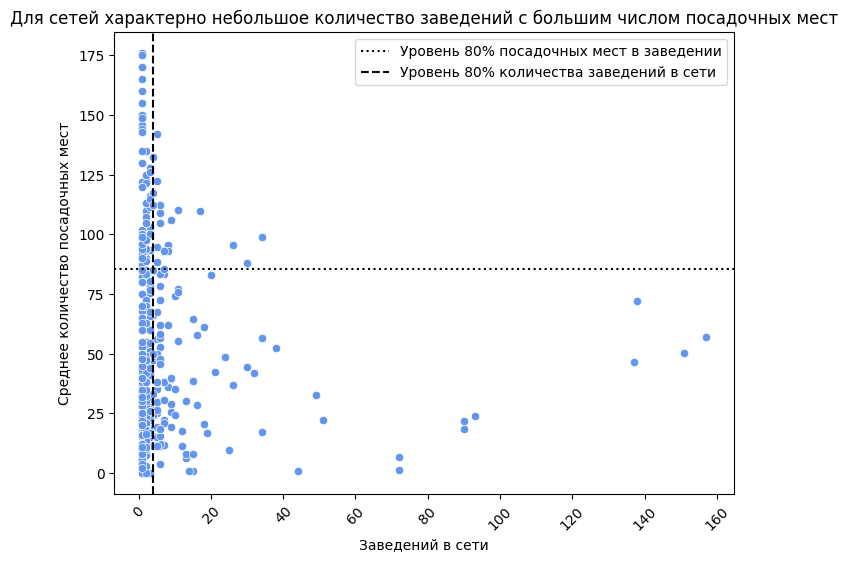

У 80% сетей число заведений не более 4, а среднее количество посадочных мест не превышает 85.


In [27]:
plt.figure(figsize = (8,6))
ax = sns.scatterplot(x='object_name', y='number', data=chain_number, color='cornflowerblue')
plt.xticks(rotation=45)
percent = 80
plt.axhline(np.percentile(chain_number['number'], percent), linestyle=':', color='black', label='Уровень {}% посадочных мест в заведении'.format(percent))
plt.axvline(np.percentile(chain_number['object_name'], percent), linestyle='--', color='black', label='Уровень {}% количества заведений в сети'.format(percent))
plt.title(label = 'Для сетей характерно небольшое количество заведений с большим числом посадочных мест')
plt.xlabel('Заведений в сети')
plt.ylabel('Среднее количество посадочных мест')
plt.legend(loc="upper right")
plt.show()
print('У {}% сетей число заведений не более {}, а среднее количество посадочных мест не превышает {}.'
      .format(percent, int(np.percentile(chain_number['object_name'], percent)), int(np.percentile(chain_number['number'], percent))))

***Среднее количество посадочных мест по типу заведений***
<a id="mean_number_type"></a>

Рассчитываем среднее количество мест по типу заведений:

In [28]:
type_number = (
    df_final
    .groupby(['object_type'])['number'].mean()
    .sort_values()
    .reset_index()
    .rename(columns={'number': 'mean_number'})
)
type_number

,object_type,mean_number
0,магазин (отдел кулинарии),5.589744
1,закусочная,7.247839
2,кафетерий,8.700508
3,предприятие быстрого обслуживания,18.609043
4,кафе,37.397233
5,бар,39.566864
6,буфет,41.492674
7,ресторан,73.127649
8,столовая,78.440294


Строим диаграмму:

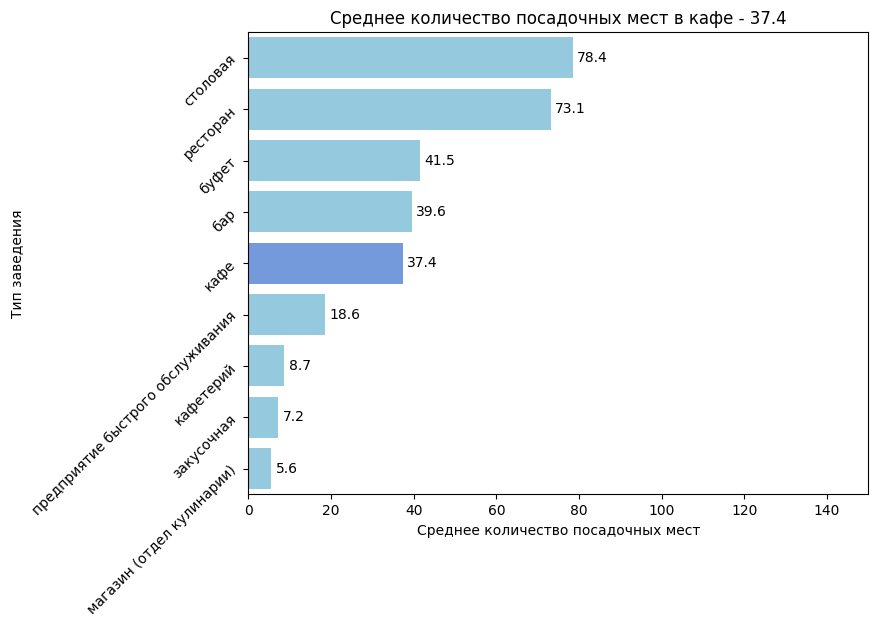

In [29]:
plt.figure(figsize = (8,6))
clrs = ['cornflowerblue' if x == 'кафе' else 'skyblue' for x in type_number['object_type']]
ax = sns.barplot(x='mean_number', y='object_type', data=type_number,
                 order=type_number.sort_values('mean_number', ascending=False).object_type, palette=clrs)
plt.xlim([0, 150])
plt.yticks(rotation=45)
plt.title(label = 'Среднее количество посадочных мест в кафе - 37.4')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Тип заведения')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center")
plt.show()

Наибольшее среднее количество посадочных мест имеют столовые - 78.4 и рестораны - 73.1.  
Наименьшее среднее количество посадочных мест имеют кафетерии - 8.7, закусочные - 7.2 и магазины (отдел кулинарии) - 5.6.  
Среднее количество посадочных мест для кафе - 37.4.

### Анализ заведений общественного питания по месту расположения
<a id="address"></a>

Добавляем в датафрейм поле, содержащее названия улиц, на которых расположены соответствующие заведения:

In [30]:
def street_search(address):
    street = []
    for i in address.split(','):
        for j in street_list:
            if j.lower() in i.lower():
                return i.strip()

In [31]:
street_list = ['набережная', 'бульвар', 'проспект', 'просек', 'шоссе', 
'проезд', 'площадь','квартал', 'улица', 'аллея', 'линия', 'мост', 'тупик', 'переулок']
df_final['street'] = df_final['address'].apply(street_search)

***Адреса без указания улиц***
<a id="no_street"></a>

Находим нестоположение объектов, в адресах которых не указана улица:

In [32]:
df_no_street = (
    df_final
    .loc[df_final['street'].isna()]
    .reset_index()
)
df_no_street['no_street'] = df_no_street['address'].apply(lambda adr: adr.split(',')[1].strip())


In [33]:
list_no_street = sorted(list(df_no_street['no_street'].unique()))
print('Местоположение объектов, в адресах которых не указана улица:')
for i in list_no_street:
    print('- {}'.format(i))

Местоположение объектов, в адресах которых не указана улица:
- 104-й километр московской кольцевой автодороги
- 19-й километр московской кольцевой автодороги
- 26-й километр московской кольцевой автодороги
- 28-й километр московской кольцевой автодороги
- 30-й километр московской кольцевой автодороги
- 31-й километр московской кольцевой автодороги
- 33-й километр московской кольцевой автодороги
- 34-й километр московской кольцевой автодороги
- 38-й километр московской кольцевой автодороги
- 42-й километр московской кольцевой автодороги
- 56-й километр московской кольцевой автодороги
- 65-й километр московской кольцевой автодороги
- 67-й километр московской кольцевой автодороги
- 73-й километр московской кольцевой автодороги
- 74-й километр московской кольцевой автодороги
- 78-й километр московской кольцевой автодороги
- 80-й километр московской кольцевой автодороги
- 82-й километр московской кольцевой автодороги
- 87-й километр московской кольцевой автодороги
- город зеленоград
- город

Находим количество адресов, в которых не указаны улицы:

In [34]:
print('Количество адресов без указания улиц: {}.'.format(df_no_street['id'].count()))

Количество адресов без указания улиц: 346.


***Топ-10 улиц по количеству объектов общественного питания***
<a id="top_10"></a>

Находим десять улиц, на которых располагаются наибольшее количество заведений:

In [35]:
all_street = (
    df_final
    .groupby('street')['id'].count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'id': 'total'})
)
top_street = all_street.iloc[0:10,]

In [36]:
top_street

,street,total
0,проспект мира,192
1,профсоюзная улица,171
2,ленинградский проспект,167
3,пресненская набережная,160
4,варшавское шоссе,154
5,ленинский проспект,138
6,проспект вернадского,119
7,кутузовский проспект,105
8,каширское шоссе,103
9,ходынский бульвар,101


Строим диаграмму:

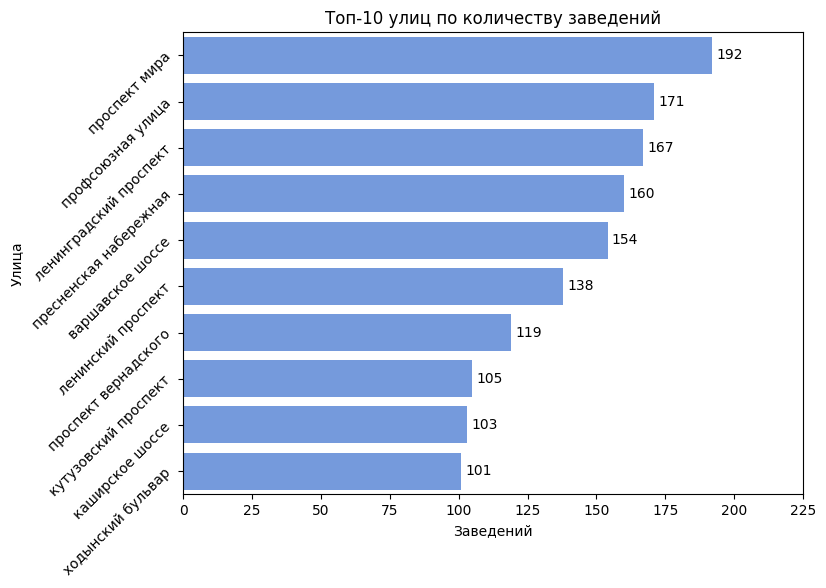

In [37]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x='total', y='street', data=top_street,
                 order=top_street.sort_values('total', ascending=False).street, color='cornflowerblue')
plt.xlim([0, 225])
plt.yticks(rotation=45)
plt.title(label = 'Топ-10 улиц по количеству заведений')
plt.xlabel('Заведений')
plt.ylabel('Улица')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center")
plt.show()

Наибольшее количество объектов располагается на следующих улицах: проспект Мира - 192, Профсоюзная улица - 171, Ленинградский проспект - 167 и Пресненская набережная - 160.

Находим районы Москвы, через которые проходят топ-10 улиц по количеству заведений:

In [38]:
def district_print(arr):
    district_list = list(top_street_district.loc[top_street_district['street'] == i, 'area'])
    return district_list

In [39]:
text_district_list = ['streetname', 'okrug', 'area']
for i in text_district_list:
    df_district[i] = df_district[i].apply(lambda x: x.lower())

top_street_district = top_street.merge(df_district, how='left', left_on='street', right_on='streetname')
top_street_list = list(top_street['street'].unique())
for i in top_street_list:
    print('Районы, в которых находится {}:'.format(i))
    for j in district_print(i):
        print('- {}'.format(j))
    print()

Районы, в которых находится проспект мира:
- алексеевский район
- ярославский район
- район марьина роща
- останкинский район
- район ростокино
- район свиблово
- мещанский район

Районы, в которых находится профсоюзная улица:
- академический район
- район черемушки
- район ясенево
- район коньково
- обручевский район
- район теплый стан

Районы, в которых находится ленинградский проспект:
- район аэропорт
- район беговой
- хорошевский район
- район сокол

Районы, в которых находится пресненская набережная:
- пресненский район

Районы, в которых находится варшавское шоссе:
- район чертаново центральное
- район чертаново северное
- район чертаново южное
- донской район
- район нагатино-садовники
- нагорный район
- район северное бутово
- район южное бутово

Районы, в которых находится ленинский проспект:
- район проспект вернадского
- район тропарево-никулино
- донской район
- район гагаринский
- ломоносовский район
- обручевский район
- район теплый стан
- район якиманка

Районы, в кот

In [40]:
top_street_fraction = (
    top_street_district
    .groupby('street')
    .agg({'total' : 'mean', 'area' : 'nunique'})
    .assign(mean_street=lambda x: x['total'] / x['area'])
    .sort_values(by='mean_street', ascending=False)
    .reset_index()
    . rename(columns={'street':'Улица', 'total' : 'Количество заведений', 'area' : 'Районов'})
)
top_street_fraction

,Улица,Количество заведений,Районов,mean_street
0,пресненская набережная,160,1,160.000000
1,ходынский бульвар,101,1,101.000000
2,кутузовский проспект,105,2,52.500000
3,ленинградский проспект,167,4,41.750000
4,профсоюзная улица,171,6,28.500000
5,проспект мира,192,7,27.428571
6,каширское шоссе,103,4,25.750000
7,проспект вернадского,119,5,23.800000
8,варшавское шоссе,154,8,19.250000
9,ленинский проспект,138,8,17.250000


Для топ-10 улиц рассчитываем среднее количество заведений на район:

In [41]:
top_street_fraction = (
    top_street_district
    .groupby('street')
    .agg({'total' : 'mean', 'area' : 'nunique'})
    .assign(mean_street=lambda x: x['total'] / x['area'])
    .sort_values(by='mean_street', ascending=False)
    .reset_index()
)
top_street_fraction

,street,total,area,mean_street
0,пресненская набережная,160,1,160.000000
1,ходынский бульвар,101,1,101.000000
2,кутузовский проспект,105,2,52.500000
3,ленинградский проспект,167,4,41.750000
4,профсоюзная улица,171,6,28.500000
5,проспект мира,192,7,27.428571
6,каширское шоссе,103,4,25.750000
7,проспект вернадского,119,5,23.800000
8,варшавское шоссе,154,8,19.250000
9,ленинский проспект,138,8,17.250000


Количество районов, через которые проходит каждая из топ-10 улиц варьируется от 1 до 8.

Строим диаграмму:

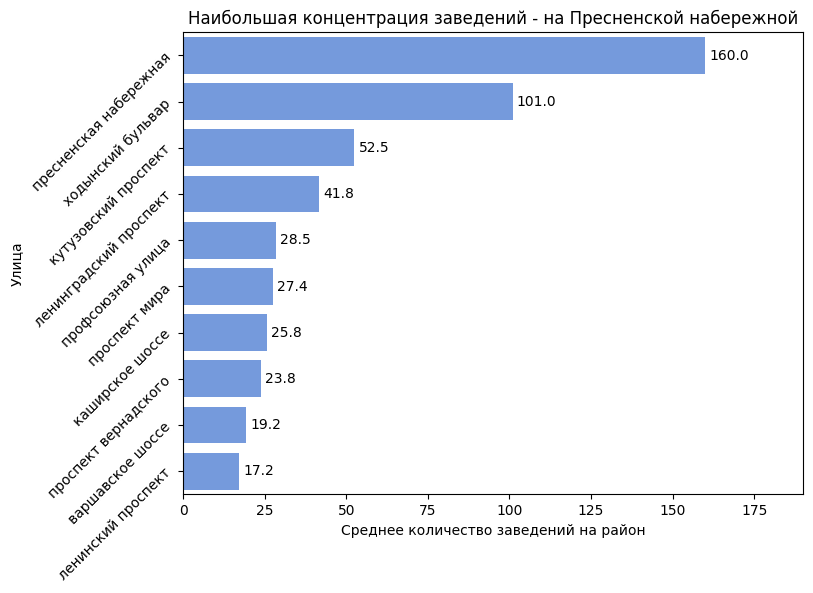

In [42]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x='mean_street', y='street', data=top_street_fraction,
                 order=top_street_fraction.sort_values('mean_street', ascending=False).street, color='cornflowerblue')
plt.xlim([0, 190])
plt.yticks(rotation=45)
plt.title(label = 'Наибольшая концентрация заведений - на Пресненской набережной')
plt.xlabel('Среднее количество заведений на район')
plt.ylabel('Улица')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center")
plt.show()

Наибольшее количество заведений расположено на проспекте мира - 192. При этом наибольшая плотность заведений наблюдается в комплексе Москва-Сити - на Пресненской набережной - 160 заведений на район.

***Улицы, на которых расположено по одному объекту общественного питания***
<a id="one_object_streets"></a>

Находим улицы, на которых расположено по одному объекту общественного питания:

In [43]:
one_rest_street = all_street.loc[all_street['total'] == 1]
print('Количество улиц с одним заведением: {}'.format(one_rest_street['total'].count()))

Количество улиц с одним заведением: 539


Находим районы Москвы, через которые проходят данные улицы:

In [44]:
one_street_merge = one_rest_street.merge(df_district, how='left', left_on='street', right_on='streetname')
one_rest_list = one_street_merge['area'].dropna().unique()

print('Районы, в которых находятся улицы с одним заведением:')
for i in one_rest_list:
    print('- {}'.format(i))

Районы, в которых находятся улицы с одним заведением:
- район южное тушино
- район косино-ухтомский
- район хорошево-мневники
- обручевский район
- южнопортовый район
- район хамовники
- даниловский район
- район преображенское
- район соколиная гора
- мещанский район
- район марьина роща
- район измайлово
- район сокольники
- бабушкинский район
- район коптево
- район ясенево
- таганский район
- район дорогомилово
- район якиманка
- район царицыно
- тверской район
- нижегородский район
- район аэропорт
- район бирюлево восточное
- район свиблово
- район перово
- район филевский парк
- район строгино
- район вешняки
- басманный район
- район щукино
- савеловский район
- район восточное измайлово
- район северный
- головинский район
- войковский район
- рязанский район
- район левобережный
- молжаниновский район
- район внуково
- район крюково
- район южное бутово
- район фили-давыдково
- район новогиреево
- район ивановское
- район котловка
- район богородское
- район кунцево
- район з

***Распределение среднего количества посадочных мест для улиц с наибольшим числом объектов общественного питания***
<a id="mean_number_top10"></a>

Рассчитываем среднее количество посадочных мест:

In [45]:
street_number = df_final.groupby('street')['number'].mean().astype('uint32').reset_index()

In [46]:
top_street_number = (
    top_street
    .merge(street_number, how='left', left_on='street', right_on='street')
    .sort_values(by='number', ascending=False)
    .reset_index(drop=True)
)
top_street_number

,street,total,number
0,проспект мира,192,53
1,кутузовский проспект,105,50
2,ленинский проспект,138,48
3,проспект вернадского,119,48
4,ленинградский проспект,167,44
5,профсоюзная улица,171,37
6,каширское шоссе,103,36
7,варшавское шоссе,154,35
8,пресненская набережная,160,34
9,ходынский бульвар,101,16


Строим диаграмму:

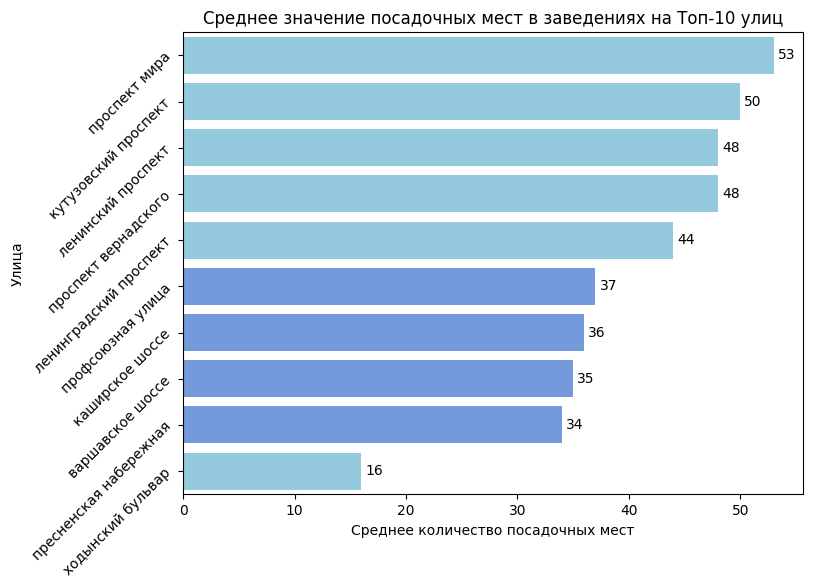

In [47]:
plt.figure(figsize = (8,6))
clrs = ['cornflowerblue' if 40 >= x >= 34 else 'skyblue' for x in top_street_number['number']]
ax = sns.barplot(x='number', y='street', data=top_street_number,
                 order=top_street_number.sort_values('number', ascending=False).street, palette=clrs)
plt.yticks(rotation=45)
plt.title(label = 'Среднее значение посадочных мест в заведениях на Топ-10 улиц')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Улица')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center")
plt.show()

По среднему количеству посадочных мест наиболее близки к этому значению для кафе (37.4) следующие улицы:  
Профсоюзная улица – 37;  
Каширское шоссе – 36;  
Варшавское шоссе - 35;  
Пресненская набережная – 34.  

***Вывод:***  
1. Наибольшее широко в Москве представлены кафе - 42.6%. Реже всего встречаются буфеты (3.9%), кафетерии (2.8%), закусочные (2.5%), магазин (отдел кулинарии) (1.9%). 
2. Сетевые заведения составляют 20.2% от общего числа.  
3. Наиболее распространена сетевая структура среди предприятий быстрого обслуживания - 41.1% (773 заведение).  
Наименее распространена сетевая структура среди баров 4.4% (37), буфетов - 2.0% (11) и столовых - 0.2% (3 заведения).  
Для кафе количество сетевых объектов - 22.8% (1368 заведений).  
4. У 80% сетей число заведений не более 4, а среднее количество посадочных мест не превышает 85.  
5. Наибольшее среднее количество посадочных мест имеют столовые - 78.4 и рестораны - 73.1.  
Наименьшее среднее количество посадочных мест имеют кафетерии - 8.7, закусочные - 7.2 и магазины (отдел кулинарии) - 5.6.  
Среднее количество посадочных мест для кафе - 37.4.  
6. Наибольшее количество объектов располагается на следующих улицах: проспект Мира - 192, Профсоюзная улица - 171, Ленинградский проспект - 167 и Пресненская набережная - 160.  
7. По среднему количеству посадочных мест наиболее близки к этому значению для кафе (37.4) следующие улицы:  
Профсоюзная улица – 37;  
Каширское шоссе – 36;  
Варшавское шоссе - 35;  
Пресненская набережная – 34.    

## Общий вывод
<a id="final"></a>

Датафрейм содержит данные по 15366 объектам, пропуски отсутствуют. Размер датафрейма - 7,1 MB.
Поля "id" и "number" имеют тип "int64", а "object_name", "chain", "object_type" и "address" - тип "object".
В датафрейме приведены уникальные заведения, дублирование отсутствует.  

Тип данных полей "chain" и "object_type" изменен с "object" на "category".
Типы данных полей "id" и "number" изменены с "int64" на "uint32" и "uint16" соответственно.
В результате оптимизации типов данных размер таблицы уменьшен на 24% (с 7.1 до 5.4 MB).  

В ходе исследования установлено, что наиболее широко на рынке заведений общественного питания Москвы представлены кафе - 39.7%.  
Процент сетевых заведений составляет 20,2% от общего числа. При этом среди кафе лишь 22.8% заведений относятся к сетевым.  
Для сетевых заведений характерно небольшое количество заведений с большим количеством посадочных мест: 80% сетей в среднем имеют 4 заведения и 85 посадочных мест.  

Наибольшее среднее количество посадочных мест имеют столовые - 78.4 и рестораны - 73.1.
Наименьшее среднее количество посадочных мест имеют кафетерии - 8.7, закусочные - 7.2 и магазины (отдел кулинарии) - 5.6.
Среднее количество посадочных мест для кафе - 37.4.  

Топ-10 улиц по количеству заведений общественного питания выглядит следующим образом:  
- проспект Мира.............192
- Профсоюзная улица.........171
- Ленинградский проспект....167
- Пресненская набережная....160
- Варшавское шоссе..........154
- Ленинский проспект........138
- проспект Вернадского......119
- Кутузовский проспект......105
- Каширское шоссе...........103
- Ходынский бульвар.........101

Протность заведений топ-10 улиц на район:  
- Пресненская набережная....160.0
- Ходынский бульвар.........101.0
- Кутузовский проспект......52.5
- Ленинградский проспект....41.7
- Профсоюзная улица.........28.5
- проспект Мира.............27.4
- Каширское шоссе...........25.7
- проспект Вернадского......23.8
- Варшавское шоссе..........19.2
- Ленинский проспект........17.2

Среднее количество посадочных мест в заведениях на топ-10 улицах: 
- проспект Мира.............53
- Кутузовский проспект......50
- Ленинский проспект........48
- проспект Вернадского......48
- Ленинградский проспект....44
- Профсоюзная улица.........37
- Каширское шоссе...........36
- Варшавское шоссе..........35
- Пресненская набережная....34
- Ходынский бульвар.........16

***Рекомендации***  
<a id="recom"></a>
Наибольшая концентрация заведений общественного питания наблюдается на Пресненской набережной - 160 на район. Там же среднее количество посадочных мест (34) близко к среднему значению посадочных мест в кафе (37.4). Основываясь на данном факте, можно предположить: среди заведений на Пресненской набережной существенную долю составляют кафе, что говорит о конкурентности данного вида заведения на этой улице.  
С учетом вышеуказанного рекомендуется рассмотреть возможность открытия кафе на Пресненской набережной. 
В связи высоким риском введения ограничительных  мер, вызванных ситуацией с пандемией COVID-19, рекомендуется перед принятием решения об открытии кафе дождаться официального окончания пандемии и полного снятия ограничений.  
В проекте приведен общий обзор рынка заведений общественного питания Москвы, без учета параметров, напрямую влияющих на финансовые показатели заведений, таких как целевая аудитория, проходимость и т.д.